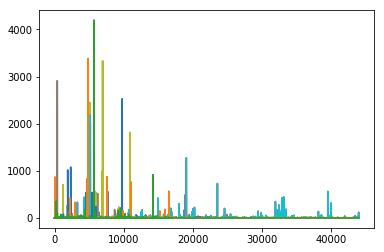

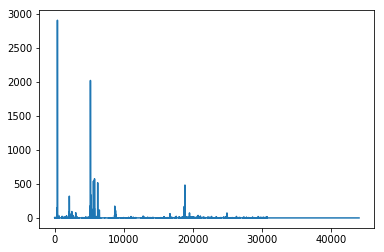

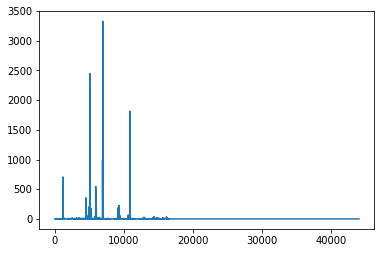

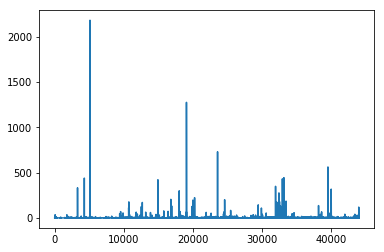

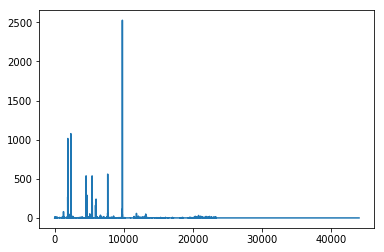

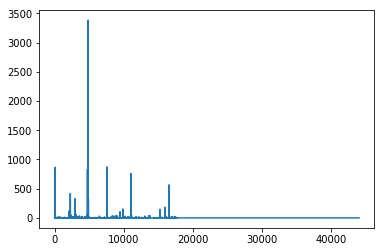

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 30 17:04:11 2017

@author: sofmonk
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob

path =r'Mouse-Dynamics-Challenge/training_files/user15/' # use your path
allFiles = glob.glob(path + "*")

session = []
for file in allFiles:
     session.append(pd.read_csv(file))

for i in range(len(allFiles)):
    session[i].rename(columns={'record timestamp': 'record_timestamp'}, inplace=True)
    session[i].rename(columns={'client timestamp': 'client_timestamp'}, inplace=True)


x = np.empty((len(allFiles)))
for i in range(len(allFiles)):
    x[i] = session[i].record_timestamp.size-1

record_time_between = np.empty((int(x.max()), len(allFiles)))

# plt.plot(session1.x)
for f in range(len(allFiles)):
    for i in range(int(x[f])):
        record_time_between[i, f] = session[f].record_timestamp[i+1] - session[f].record_timestamp[i]

for f in range(len(allFiles)):
        plt.plot(record_time_between[:, f])
        plt.show()


In [6]:

stats_time = np.empty((5, len(allFiles)))

for f in range(len(allFiles)):
    stats_time[0, f] = np.amin(record_time_between[:, f])
    stats_time[1, f] = np.amax(record_time_between[:, f])
    stats_time[2, f] = np.ptp(record_time_between[:, f])
    stats_time[3, f] = np.mean(record_time_between[:, f])
    stats_time[4, f] = np.std(record_time_between[:, f])

print(pd.DataFrame(stats_time))



             0            1            2            3            4  \
0     0.000000     0.000000     0.000000     0.000000     0.000000   
1  4193.636000  2909.984000  3329.135000  2180.993000  2526.992000   
2  4193.636000  2909.984000  3329.135000  2180.993000  2526.992000   
3     0.277662     0.410817     0.404003     0.589523     0.304091   
4    20.649781    17.956782    22.794759    14.393770    14.928956   

             5  
0     0.000000  
1  3381.125000  
2  3381.125000  
3     0.337478  
4    18.697008  


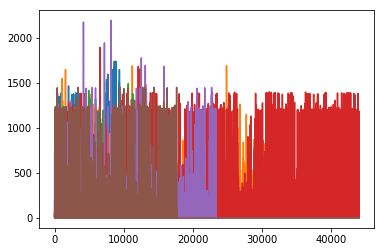

In [8]:
def distance(x1, y1, x2, y2):
    return math.sqrt(((x2-x1)**2) + ((y2-y1)**2))

    
distance_travelled = np.empty((int(x.max()), len(allFiles)))

for f in range(len(allFiles)):
    for i in range(int(x[f])):
        distance_travelled[i, f] = (distance(session[f].x[i], session[f].y[i], session[f].x[i + 1], session[f].y[i + 1]))


plt.plot(distance_travelled)
plt.show()



In [11]:
stats_dist = np.empty((5, len(allFiles)))

for f in range(len(allFiles)):
    stats_dist[0, f] = np.amin(distance_travelled[:, f])
    stats_dist[1, f] = np.amax(distance_travelled[:, f])
    stats_dist[2, f] = np.ptp(distance_travelled[:, f])
    stats_dist[3, f] = np.mean(distance_travelled[:, f])
    stats_dist[4, f] = np.std(distance_travelled[:, f])

print(pd.DataFrame(stats_time))

             0            1            2            3            4  \
0     0.000000     0.000000     0.000000     0.000000     0.000000   
1  4193.636000  2909.984000  3329.135000  2180.993000  2526.992000   
2  4193.636000  2909.984000  3329.135000  2180.993000  2526.992000   
3     0.277662     0.410817     0.404003     0.589523     0.304091   
4    20.649781    17.956782    22.794759    14.393770    14.928956   

             5  
0     0.000000  
1  3381.125000  
2  3381.125000  
3     0.337478  
4    18.697008  


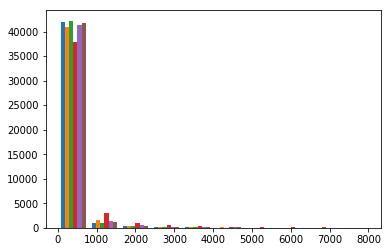

In [13]:

def speed(d, t):
    return d/t

speed_move = np.empty((int(x.max()), len(allFiles)))
for f in range(len(allFiles)):
    for i in range(int(x[f])):
        if record_time_between[i, f] == 0:
            speed_move[i, f] = 0
        else:
            speed_move[i, f] = speed(distance_travelled[i, f], record_time_between[i, f])
            
plt.hist(speed_move, range = (0, 8000))
plt.show()


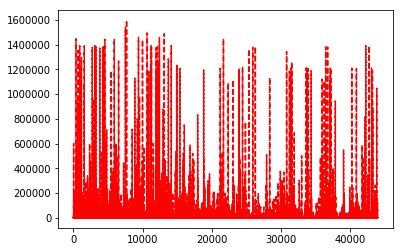

In [14]:
plt.plot(speed_move, 'r--')
plt.show()

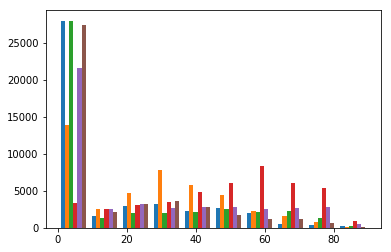

In [17]:
direction = np.empty((int(x.max()), len(allFiles)))
for f in range(len(allFiles)):
    for i in range(int(x[f])):
        direction[i, f] = math.degrees(math.atan2(session[f].y[i], session[f].x[i]))
        

plt.hist(direction)
plt.show()

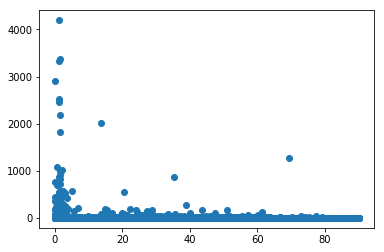

In [18]:
plt.scatter(direction, record_time_between)
plt.show()

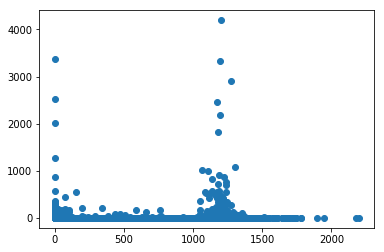

In [19]:
plt.scatter(distance_travelled, record_time_between)
plt.show()

In [ ]:

################
    
    #####angle of curvature
#    
#distance3 =  np.empty((x,1))
#for i in range(x-2):
#    distance3[i] = distance(session1.x[i],session1.y[i],session1.x[i+2], session1.y[i+2])
#    
#def anglecurv(a, b, c):
#    return math.acos(np.round(((a**2) + (b**2) - (c**2))/2*a*b))
#
#angle_curvature = np.empty((x,1))
#for i in range(x):
#    angle_curvature[i] = anglecurv(distance_travelled[i], distance_travelled[i+1], distance3[i])
#    
#distance_travelled[1], distance_travelled[2], distance3[1]


################
#plt.plot(record_time_between, session1.button)
#
#plt.plot(distance_travelled, )
#
#
#plt.ylim(0,500)
